# Idea 1 for non-sequential cropping: 
### 0. Images are cropped at a larger size of 512 * 512 instead of 50 * 50
### 1. The sum of rows, and columns of pixels in 512 * 512 image size is used to detect neuron.
### 2. A region of interest is detected based on the width of the peak on 512 * 512.
### 3. Two hyperparameters are used: a) Width size b) Relative height at which width is measured.
### Advantage over sequential cropping:
### a) There are 105, 50 * 50 images in one 512 * 512 image. Region of Interests (ROI) or no detection of neuron in 512*512 images reduces potential area to be searched for neuron.
### b) Significantly faster than running sequential 50 * 50 scan over every row.

## Steps:
### 1. Find an ideal filter to reduce the noise and retain edge information.
### 2. Surprisingly, median-filter is performing better than bilateral-filter (suppose to retain edge).
### 3. The peaks of the sums are detected.
### 4. The width for these peaks is measured over different relative heights of the peak..
### a) Width is used instead of peaks (intensity of pixels) in order measure spread of signal (roughly size of the neuron).   
###   b) Peaks greater than minimum width is extracted (minimum value is from the histogram of diameter of neuron).
### 5. Horizontal and vertical lines are drawn over the image to see if they inculde the neuron in ROI. 
### 6. This can be used for localizing the search with 50 * 50 image size and/or discarding the 512*512 images without any neuron. 

## Best filter for edge detection of Neuron
### 1. Different filters are checked to find the one with retention of best edge resolution

In [2]:
#import SimpleITK as sp
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
img = cv.imread('138.tif',0)

#blur = cv.GaussianBlur(img,(5,5),0)
#blur = cv.bilateralFilter(img,9,75,75)
blur = cv.medianBlur(img,5)


#plt.imshow(img,cmap='gray')
#plt.figure(figsize=(5,5))




## The sum of pixels along the row and column are taken

1.0


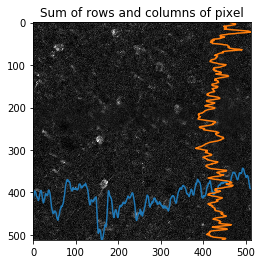

In [24]:
#print(img)

#Sum of columns
Sum_each_column = np.sum(blur, axis=1)
Sum_each_column = list(map(float,Sum_each_column))
Sum_each_column = np.array(Sum_each_column)
Sum_each_column = Sum_each_column/abs(max(Sum_each_column)) # Normallized to overlay with the image
print(max(Sum_each_column))

#Sum of rows
Sum_each_row = np.sum(blur, axis=0)
Sum_each_row = list(map(float,Sum_each_row))
Sum_each_row = np.array(Sum_each_row)
Sum_each_row = Sum_each_row/abs(max(Sum_each_row)) # Normallized to overlay with the image

plt_of_row = plt.plot(np.arange(512),Sum_each_row*512) 
plt.plot(Sum_each_column*512,np.arange(512))
plt_of_image = plt.imshow(img,cmap='gray')
plt.title('Sum of rows and columns of pixel')
plt.show()


### Note for above plot: The peaks for sum of rows (blue) is inverted

## To find the widths of the peaks at two different heights
### 1. Instead of intensity of the peak the width of the peak is used for detecting the neuron.
### Hyperparameters:
####  1.  The height at which width is measured
####  2.  The minimum width to be measured 

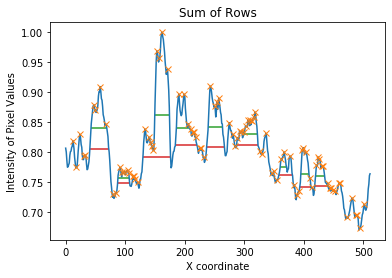

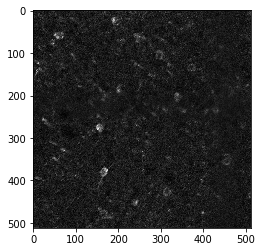

In [5]:
from scipy.signal import chirp, find_peaks, peak_widths

half_height_neuron = []
two_third_height_neuron =[]
l0 = []
p0 = []


# Finds the peak and width at half height and two thirds height.
peaks, _ = find_peaks(Sum_each_row) # finds the peak
results_half = peak_widths(Sum_each_row, peaks, rel_height=0.5) #results_half saves four arrays: [[width],[height of width],[x1: beginning coordinate of width],[x2: end coordinate of width]]
results_two_thirds = peak_widths(Sum_each_row, peaks, rel_height=0.75) # finds the width at the two thirds height

#print((results_half[0])) 

# Indices for width at half the height
for i in results_half[0]:
        index_0 = np.where([results_half[0]==i for i in results_half[0] if i>10])
        l0.append(i)
        
        
#Indices for width at two thirds height
for i in results_two_thirds[0]:
        index_0_twothirds = np.where([results_half[0]==i for i in results_half[0] if i>10])
        p0.append(i)


# extracted indices for half the height                
extracted_l1_half = []
extracted_l2_half = []
extracted_l3_half = []

l1 = results_half[1]
l2 = results_half[2]
l3 = results_half[3]

for i in index_0[1]:
    extracted_l1_half.append(l1[i])
    extracted_l2_half.append(l2[i])
    extracted_l3_half.append(l3[i])

    
Horizontal_l_half = tuple([l0,extracted_l1_half,extracted_l2_half,extracted_l3_half]) #argument to hline function

# extracted indices for two thirds the height
extracted_l1_twothirds = []
extracted_l2_twothirds = []
extracted_l3_twothirds = []

p1 = results_two_thirds[1]
p2 = results_two_thirds[2]
p3 = results_two_thirds[3]

for i in index_0[1]:
    extracted_l1_twothirds.append(p1[i])
    extracted_l2_twothirds.append(p2[i])
    extracted_l3_twothirds.append(p3[i])

    
Horizontal_l_two = tuple([p0,extracted_l1_twothirds,extracted_l2_twothirds,extracted_l3_twothirds]) #argument to hline function

                

        
plt.plot(Sum_each_row)
plt.plot(peaks, Sum_each_row[peaks], "x")
#plt.imshow(img,cmap='gray')
plt.hlines(*Horizontal_l_half[1:],color="C2")
plt.hlines(*Horizontal_l_two[1:],color="C3")
plt.title('Sum of Rows')
plt.xlabel('X coordinate')
plt.ylabel('Intensity of Pixel Values')
plt.show()

plt.imshow(img,cmap='gray')
plt.show()


## Width from the sum of columns.

(4, 77)


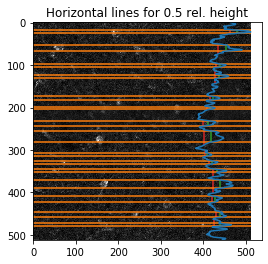

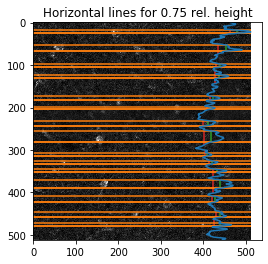

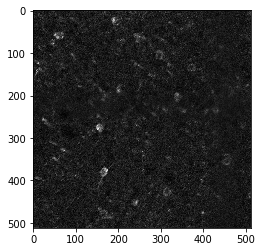

In [22]:
from scipy.signal import chirp, find_peaks, peak_widths


half_height_neuron = []
two_third_height_neuron =[]
l0 = []
p0 = []



peaks, _ = find_peaks(Sum_each_column) # finds the peak
results_half = peak_widths(Sum_each_column, peaks, rel_height=0.50) #finds the the width at the half the height
results_two_thirds = peak_widths(Sum_each_column, peaks, rel_height=0.75) # finds the width at the two thirds height

print((np.array(results_half).shape)) # shape of results_half: it consists of 4 arrays each representing width, 

# Indices for width at half the height for width>6 pixels is extracted
for i in results_half[0]:
        index_0 = np.where([results_half[0]==i for i in results_half[0] if i>6])
        l0.append(i)
        
        
#Indices for width at two thirds height for width>6 pixels is extracted
for i in results_two_thirds[0]:
        index_0_twothirds = np.where([results_half[0]==i for i in results_half[0] if i>6])
        p0.append(i)


# extracted indices for half the height                
extracted_l1_half = []
extracted_l2_half = []
extracted_l3_half = []

l1 = results_half[1]*512 #Rescaled to overlay on image 
l2 = results_half[2]
l3 = results_half[3]

for i in index_0[1]:
    extracted_l1_half.append(l1[i])
    extracted_l2_half.append(l2[i])
    extracted_l3_half.append(l3[i])

    
Horizontal_l_half = tuple([l0,extracted_l1_half,extracted_l2_half,extracted_l3_half]) #argument to hline function

# extracted indices for two thirds the height
extracted_l1_twothirds = []
extracted_l2_twothirds = []
extracted_l3_twothirds = []

p1 = results_two_thirds[1]*512 # This  saves the height (y) at which the hlines are made. Rescaled to overlay on image 
p2 = results_two_thirds[2]
p3 = results_two_thirds[3]

for i in index_0[1]:
    extracted_l1_twothirds.append(p1[i])
    extracted_l2_twothirds.append(p2[i])
    extracted_l3_twothirds.append(p3[i])

    
Horizontal_l_two = tuple([p0,extracted_l1_twothirds,extracted_l2_twothirds,extracted_l3_twothirds]) #argument to hline function

                

        
plt.plot(Sum_each_column*512,np.arange(512))
#plt.plot(peaks, Sum_each_column[peaks], "x")
plt.title('Horizontal lines for 0.5 rel. height')
plt.imshow(img,cmap='gray')
plt.vlines(*Horizontal_l_half[1:],color="C2")
plt.vlines(*Horizontal_l_two[1:],color="C3")
#Width for column sum with two third height:
#Horizontal_l_two[2].extend(Horizontal_l_two[3])
#plt.hlines(Horizontal_l_two[2],0,512,color='C1')
#width for column sum with half the height:
Horizontal_l_half[2].extend(Horizontal_l_half[3])
plt.hlines(Horizontal_l_half[2],0,512,color='C1')
plt.savefig('Horizontal_line_0.5.pdf')
plt.show()

plt.plot(Sum_each_column*512,np.arange(512))
#plt.plot(peaks, Sum_each_column[peaks], "x")
plt.title('Horizontal lines for 0.75 rel. height')
plt.imshow(img,cmap='gray')
plt.vlines(*Horizontal_l_half[1:],color="C2")
plt.vlines(*Horizontal_l_two[1:],color="C3")
#Width for column sum with two third height:
#Horizontal_l_two[2].extend(Horizontal_l_two[3])
#plt.hlines(Horizontal_l_two[2],0,512,color='C1')
#width for column sum with half the height:
Horizontal_l_half[2].extend(Horizontal_l_half[3])
plt.hlines(Horizontal_l_half[2],0,512,color='C1')
plt.savefig('Horizontal_line_0.75.pdf')
plt.show()

plt.imshow(img,cmap='gray')
plt.show()

### Note for above:  Changing the relative height from 0.5 to 0.75 is like decreasing the senstivity of the instrument.
###  1. The horizontal lines for 0.5 rel height detect all 12 neuron with 4 false positives!
###  2. The horizontal lines for 0.75 height also detect all 12 neurons with 3 false positves!

## Width from the sum of rows is used for detecting region of interest.
###  Hyperparameters:
####  1.  The height at which width is measured
####  2.  The minimum width to be measured 
### The hyperparameters 2. is set by the measurement from the histogram.

(4, 91)


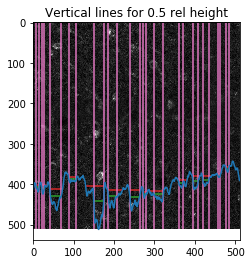

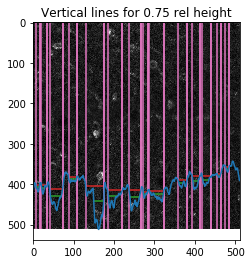

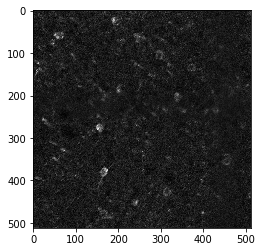

In [20]:
from scipy.signal import chirp, find_peaks, peak_widths


half_height_neuron = []
two_third_height_neuron =[]
l0 = []
p0 = []



peaks, _ = find_peaks(Sum_each_row) # finds the peak
results_half = peak_widths(Sum_each_row, peaks, rel_height=0.5) #finds the the width at the half the height
results_two_thirds = peak_widths(Sum_each_row, peaks, rel_height=0.75) # finds the width at the two thirds height

print((np.array(results_half).shape)) # shape of results_half: it consists of 4 arrays each representing width, 

# Indices for width at half the height
for i in results_half[0]:
        index_0 = np.where([results_half[0]==i for i in results_half[0] if i>6])
        l0.append(i)
        
        
#Indices for width at two thirds height
for i in results_two_thirds[0]:
        index_0_twothirds = np.where([results_half[0]==i for i in results_half[0] if i>6])
        p0.append(i)


# extracted indices for half the height                
extracted_l1_half = []
extracted_l2_half = []
extracted_l3_half = []

l1 = results_half[1]*512 
l2 = results_half[2]
l3 = results_half[3]

for i in index_0[1]:
    extracted_l1_half.append(l1[i])
    extracted_l2_half.append(l2[i])
    extracted_l3_half.append(l3[i])

    
Horizontal_l_half = tuple([l0,extracted_l1_half,extracted_l2_half,extracted_l3_half]) #argument to hline function

# extracted indices for two thirds the height
extracted_l1_twothirds = []
extracted_l2_twothirds = []
extracted_l3_twothirds = []

p1 = results_two_thirds[1]*512 # This  saves the height (y) at which the hlines are made. Rescaled to overlay on image 
p2 = results_two_thirds[2]
p3 = results_two_thirds[3]

for i in index_0[1]:
    extracted_l1_twothirds.append(p1[i])
    extracted_l2_twothirds.append(p2[i])
    extracted_l3_twothirds.append(p3[i])

    
Horizontal_l_two = tuple([p0,extracted_l1_twothirds,extracted_l2_twothirds,extracted_l3_twothirds]) #argument to hline function

                
#print(Horizontal_l_half[2])
#print(Horizontal_l_half[3])


    

plt.plot(Sum_each_row*512)
#plt.plot(peaks, Sum_each_column[peaks], "x")
plt.imshow(img,cmap='gray')
plt.title('Vertical lines for 0.5 rel height')
plt.hlines(*Horizontal_l_half[1:],color="C2")
plt.hlines(*Horizontal_l_two[1:],color="C3")
#Vertical line coordinates:
Horizontal_l_half[2].extend(Horizontal_l_half[3])
Horizontal_l_two[2].extend(Horizontal_l_two[3])
#plt.vlines(Horizontal_l_half[2],0,512,color='C1')
plt.vlines(Horizontal_l_half[2],0,512,color='C6')
plt.savefig('Vertical_line_0.5.pdf')
plt.show()


plt.plot(Sum_each_row*512)
#plt.plot(peaks, Sum_each_column[peaks], "x")
plt.imshow(img,cmap='gray')
plt.title('Vertical lines for 0.75 rel height')
plt.hlines(*Horizontal_l_half[1:],color="C2")
plt.hlines(*Horizontal_l_two[1:],color="C3")
#Vertical line coordinates:
Horizontal_l_half[2].extend(Horizontal_l_half[3])
Horizontal_l_two[2].extend(Horizontal_l_two[3])
#plt.vlines(Horizontal_l_half[2],0,512,color='C1')
plt.vlines(Horizontal_l_two[2],0,512,color='C6')
plt.savefig('Vertical_line_0.75.pdf')
plt.show()

#print(Horizontal_l_two[2])
plt.imshow(img,cmap='gray')
plt.show()


### For width at 0.5 rel. height has 11 detection out of 12 neurons and 7 false positive detection (most of look like neuron even with naked eye).
### For width at 0.75 rel. height we have 10 detections out of 12 and 11 false positive detection (some of them look neuron in naked eye and others are elongated strands of noise)
## Conlcusion: 
### a) Combination both the row and column for a noise filtered image can predict the presence of neuron.
### b) It can be used to localize the area of search to that particular row or column of interests
### c) NOT a good idea to localize to a square area of search by combining both row and column sum as neurons can be hiding behind each other!

# Idea 2: 
### 1. Converting the sum of rows and columns of pixel into sound.
### 2. Using the algorithms that filter noise from sound.
### 3. In particular, algorithms used for cocktail party problem: FastICA and FOBI.
### 4. Cocktail party problem: Is when two people are speaking simultaneously, and one of them is closer to microphone 1 and the other is closer to microphone 2. 
### 5. Therefore, both of their voice is mixed with different intensities in the two microphones 
### 6. The question is, is it possible to separate the two sounds again from the two mixed sounds.
### 7. In our case, I am using sum of rows as one sound (neurons) mixed with other sound (background) and likewise for the columns.
### 8. Therefore, sum of rows and columns are close to the cocktail party problem in the visual medium. 

In [5]:
#To convert to sums of rows and columns to sound
import scipy.io.wavfile as wavf
import numpy as np

if __name__ == "__main__":

    samples = np.random.randn(44100)
    fs = 512
    out_f = 'out_column.wav'

    wavf.write(out_f, fs, Sum_each_column)

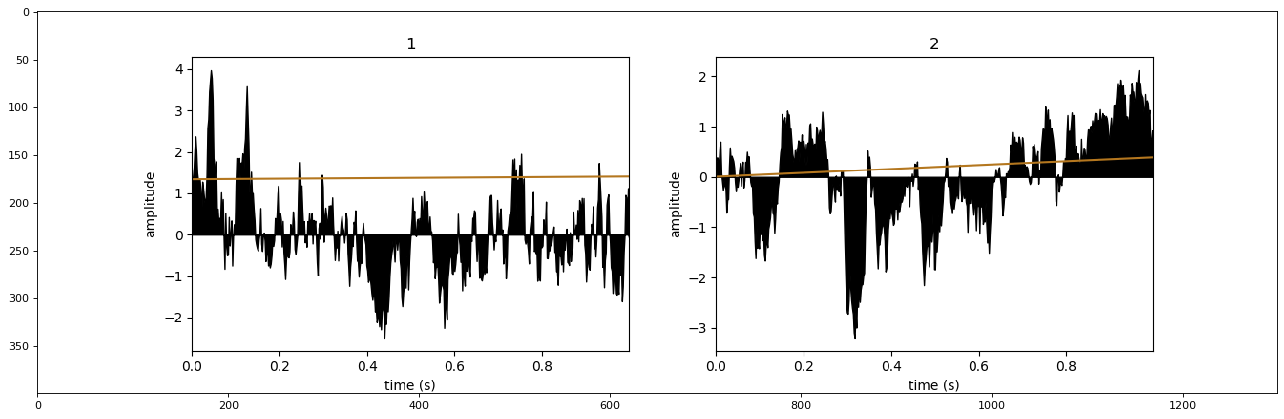

In [35]:
# This plots the separated sound for row and column from the noise
# The separation was done in a separate notebook using FASTICA and FOBI
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
import cv2 as cv

img = cv.imread('Noise_filtered.png')
figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(img)

## NOTE: 
### 1. Plot 1 is sum of rows that is converted to sound and filtered using FASTICA and FOBI
### 2. Plot 2 is the sum of columns that is converted to sound and filteres using FASTICA and FOBI 
### 3. This is still work in progress to extract the ROI's of neuron